# Unit Root Processが生ずる擬似相関
本稿では、

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
using GLM, Plots, Random, Distributions, DataFrames

In [2]:
function randomwalk(n, x::Float64 = 0.0)
    X = [x]
    d = Normal(0,1)
    for i = 1:n-1
        x += rand(d)
        append!(X, [x])
    end
    X
end

randomwalk (generic function with 2 methods)

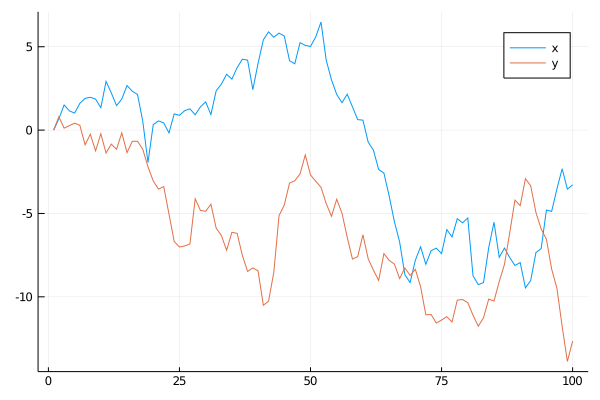

In [3]:
Random.seed!(0)
x = randomwalk(100)
y = randomwalk(100)
plot(1:100, [x y], label = ["x" "y"])

In [4]:
df = DataFrame([y x], [:y,:x])
model_OLS = lm(@formula(y ~ x), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y ~ 1 + x

Coefficients:
────────────────────────────────────────────────────────────────────────────
              Estimate  Std. Error   t value  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -5.5835     0.332008   -16.8174    <1e-29  -6.24236   -4.92464
x             0.391619   0.0690844    5.6687    <1e-6    0.254523   0.528714
────────────────────────────────────────────────────────────────────────────

In [5]:
function simulation(n, seed = 0)
    Random.seed!(seed)
    rejected = 0
    for i = 1 : n
        x = randomwalk(100)
        y = randomwalk(100)
        model_OLS = lm([ones(100) x], y)
        if coeftable(model_OLS).cols[4][2] < 0.05
            rejected += 1
        end
    end
    rejected / n
end

simulation (generic function with 2 methods)

In [6]:
simulation(100000)

0.76063

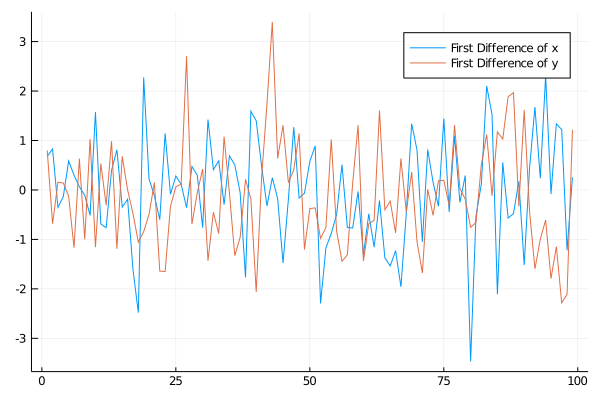

In [34]:
x_fd = [x[i] - x[i-1] for i = 2 : length(x)]
y_fd = [y[i] - y[i-1] for i = 2 : length(y)]
plot(1:99, [x_fd y_fd], label = ["First Difference of x" "First Difference of y"])

In [24]:
df_fd = DataFrame([y_fd x_fd], [:y_fd,:x_fd])
model_OLS = lm(@formula(y_fd ~ x_fd), df_fd)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y_fd ~ 1 + x_fd

Coefficients:
────────────────────────────────────────────────────────────────────────────
              Estimate  Std. Error   t value  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.13144     0.107396  -1.22387    0.2240  -0.344592  0.0817126
x_fd         -0.108761    0.10194   -1.06691    0.2887  -0.311084  0.0935616
────────────────────────────────────────────────────────────────────────────

In [31]:
function simulation_fd(n, seed = 0)
    Random.seed!(seed)
    rejected = 0
    for i = 1 : n
        x = randomwalk(100)
        y = randomwalk(100)
        x_fd = [x[i] - x[i-1] for i = 2 : length(x)]
        y_fd = [y[i] - y[i-1] for i = 2 : length(y)]
        model_OLS = lm([ones(99) x_fd], y_fd)
        if coeftable(model_OLS).cols[4][2] < 0.05
            rejected += 1
        end
    end
    rejected / n
end

simulation_fd (generic function with 2 methods)

In [32]:
simulation_fd(100000)

0.05